# 1. Loading data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("D:\\Msc Case study & Projects\\Loan prediction project\\loandata.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Train Categorical Variables Missisng values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df ['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)


# Train Numerical Variables Missing Values
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
df_copy=df.copy()

In [11]:
df_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Vizualisation

In [12]:
df_cols = df[['Gender','Married', 'Dependents', 'Education','Self_Employed','Property_Area','Credit_History']]
df_cols

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History
0,Male,No,0,Graduate,No,Urban,1.0
1,Male,Yes,1,Graduate,No,Rural,1.0
2,Male,Yes,0,Graduate,Yes,Urban,1.0
3,Male,Yes,0,Not Graduate,No,Urban,1.0
4,Male,No,0,Graduate,No,Urban,1.0
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,1.0
610,Male,Yes,3+,Graduate,No,Rural,1.0
611,Male,Yes,1,Graduate,No,Urban,1.0
612,Male,Yes,2,Graduate,No,Urban,1.0


In [13]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [15]:
gender=pd.crosstab(df['Gender'],df_copy['Loan_Status']) 
gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


In [16]:
area=pd.crosstab(df['Property_Area'],df_copy['Loan_Status']) 
area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [17]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [19]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [20]:
# normalise can be set to true to print proportion instead of number
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

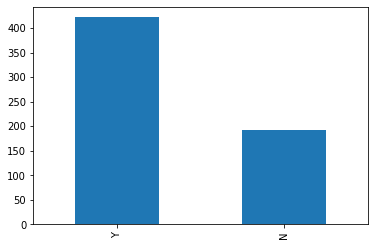

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
df['Loan_Status'].value_counts().plot.bar()

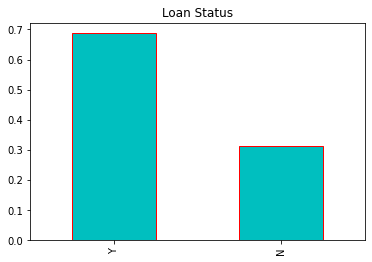

In [22]:
df['Loan_Status'].value_counts(normalize=True).plot.bar(title='Loan Status',color='c',edgecolor='r')


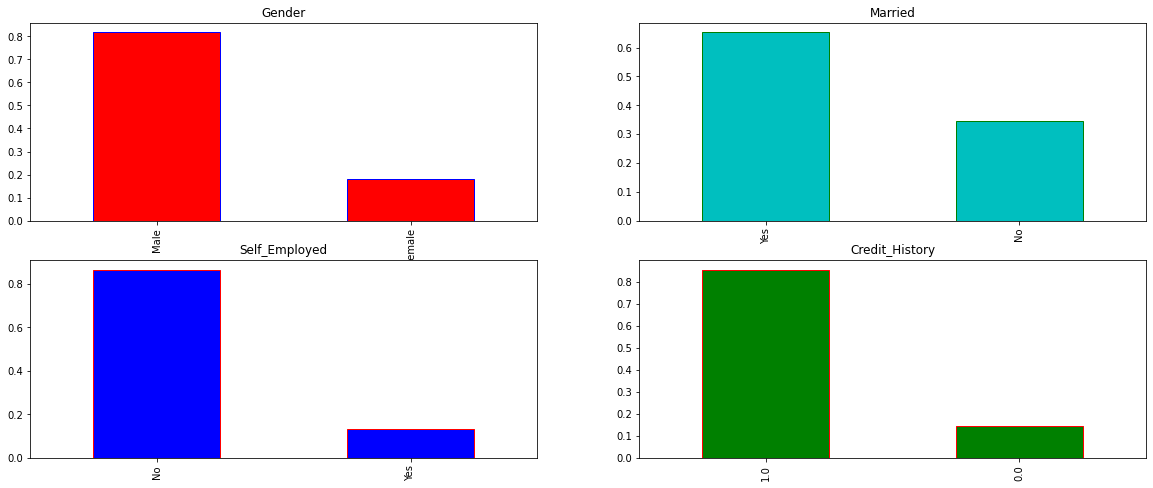

In [23]:
plt.figure(figsize=(20, 8))
plt.subplot(2,2,1)
df['Gender'].value_counts(normalize=True).plot.bar(title='Gender',color='r',edgecolor='b')

plt.subplot(2,2,2)
df['Married'].value_counts(normalize=True).plot.bar(title='Married',color='c',edgecolor='g')

plt.subplot(2,2,3)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed',color='b',edgecolor='r')

plt.subplot(2,2,4)
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History',color='g',edgecolor='r')



From above bar plots we conclude that.
- 80% applicants in dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% of the applicants in the dataset are self-employed.
- Around 85% of the applicants have repaid their debts.

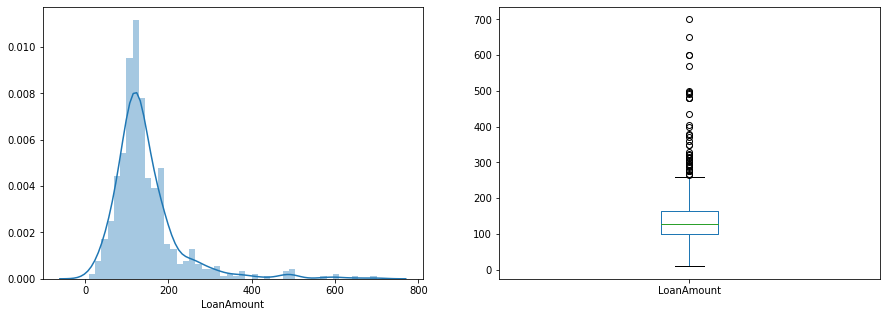

In [24]:
# Distribution of loan amount variable
import seaborn as sns
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df['LoanAmount'])

plt.subplot(1,2,2)
df['LoanAmount'].plot.box()


we see a lot of outliers in this variable and distribution is fairly normal.

Text(0, 0.5, 'Percentage')

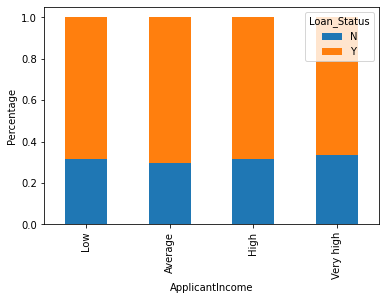

In [25]:
# lets make bins for applicant income variable based on the values in it and analyze the corresponding loan status for each bin.
import pandas as pd
bins=[0,2500,4000,6000,81000]
group = ['Low','Average','High','Very high']
df['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(df['Income_bin'],df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

It can be reffered that applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assuned that 
if the applicant income is high the chances of loan approval will also be high.

Text(0, 0.5, 'Percentage')

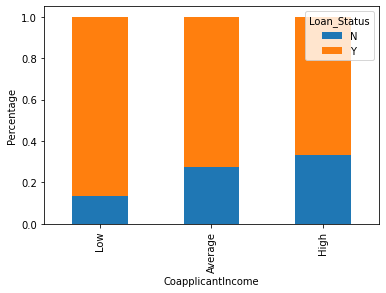

In [26]:
# now analyze the coapplicant income and loan amount variable in same manner
bins=[0,1000,3000,42000]
group = ['Low','Average','High']
df['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(df['Coapplicant_Income_bin'],df['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

It shows that if coapplicant income is less the chances of loan approval are high .But this does not look right.The possible reason behind this 
may be the most of the applicant dont have any coapplicant so coapplicant income for such applicant is 0 and hence loan approval is not 
dependent on it.so make new variable in which we will combine the applicants and coapplicants income to visualize the combined effect of loan approval.

Text(0, 0.5, 'Percentage')

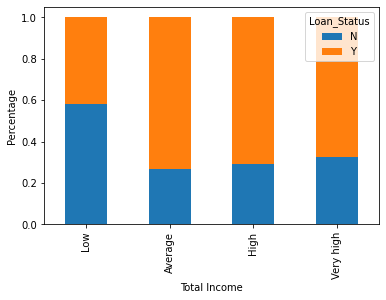

In [27]:
# combine applicant income and coapplicant income and see the combined effects of total incomeon the loan status
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']

bins=[0,2500,4000,6000,81000]
group = ['Low','Average','High','Very high']
df['Total_Income_bin']=pd.cut(df['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(df['Total_Income_bin'],df['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')

We can see that proportion of loans getting approved for applicants having low Total Income is very less as compared to that of applicant with Average,High ,Very high income.

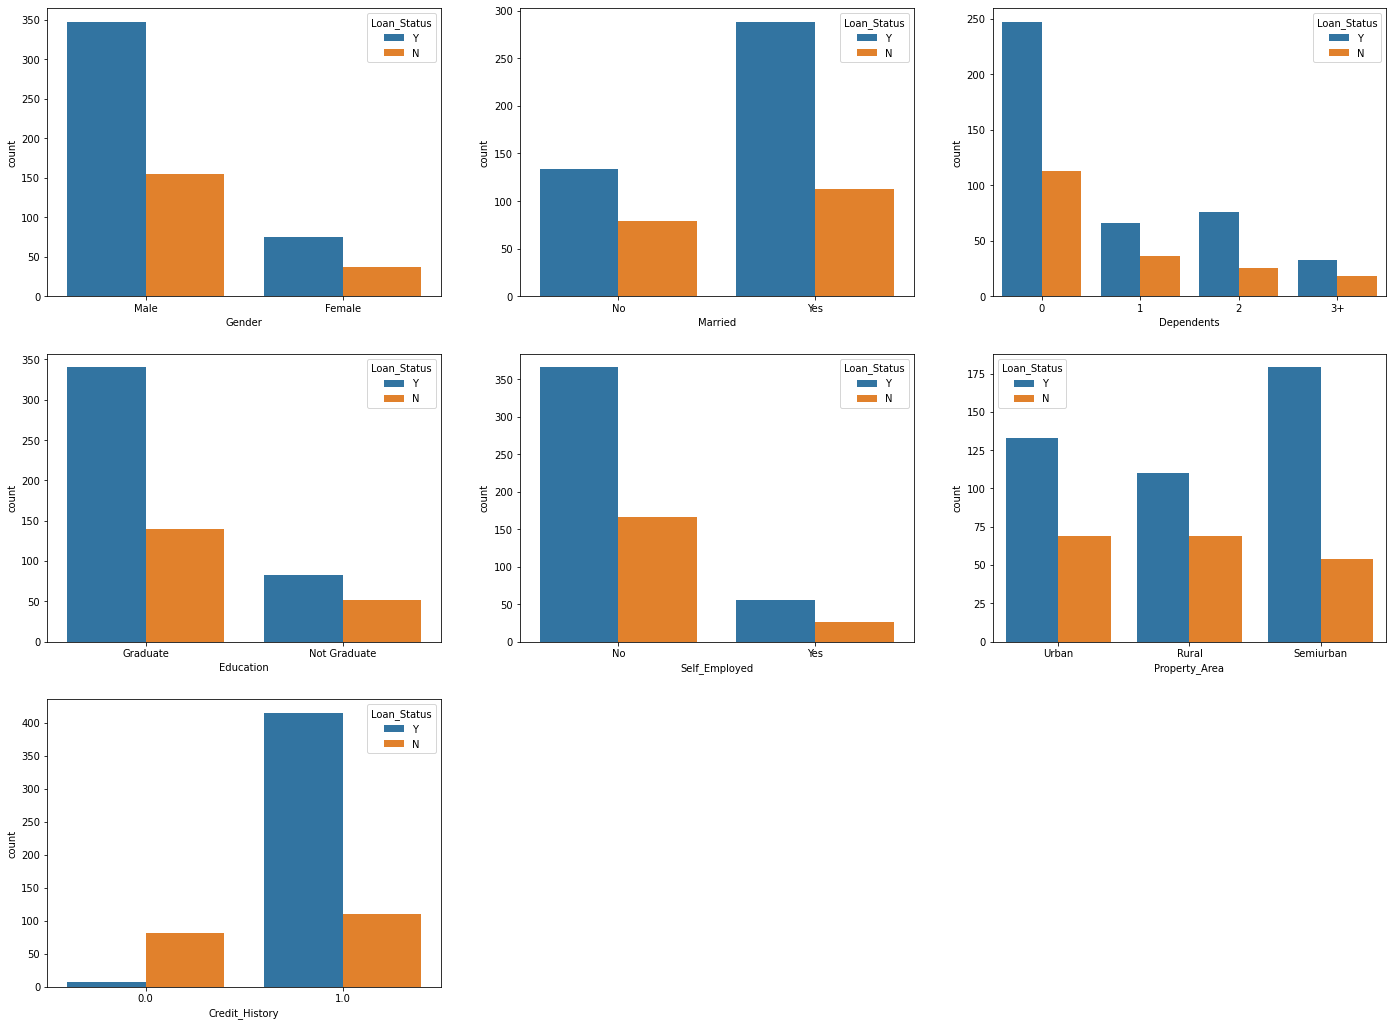

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



plt.figure(figsize=(24, 18))

for idx, cols in enumerate(df_cols):
    
    plt.subplot(3, 3, idx+1)
    
    sns.countplot(cols, data= df, hue='Loan_Status')

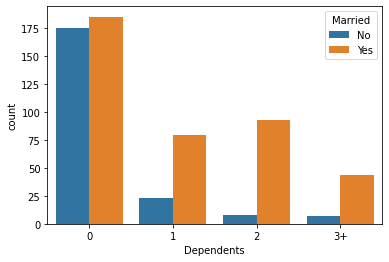

In [29]:
sns.countplot(x='Dependents', hue='Married', data=df)

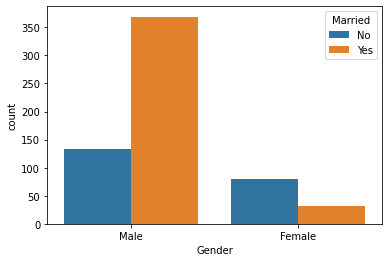

In [30]:
sns.countplot(x='Gender', hue='Married', data=df)

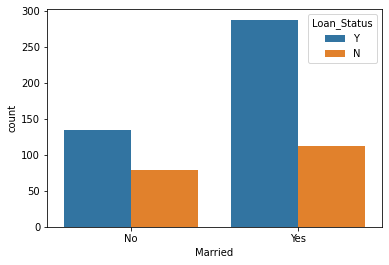

In [31]:
sns.countplot(x='Married', hue='Loan_Status', data=df)

In [32]:
import matplotlib.style as style
%matplotlib inline

style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

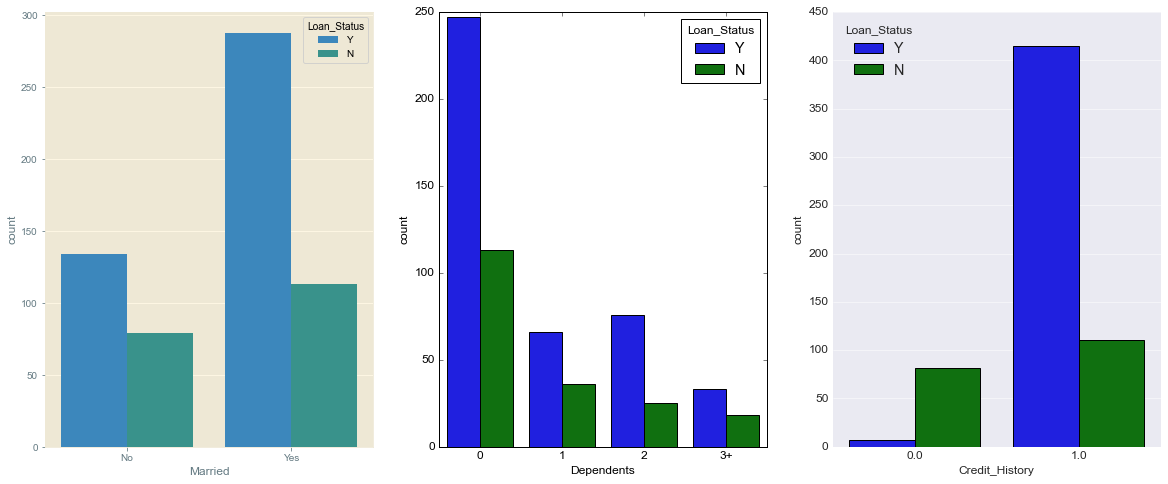

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
style.use('Solarize_Light2')
plt.subplot(1,3,1)
sns.countplot(df_cols['Married'],data= df,hue='Loan_Status')

style.use('classic')
plt.subplot(1,3,2)
sns.countplot(df_cols['Dependents'],data= df,hue='Loan_Status')

style.use('seaborn-darkgrid')
plt.subplot(1,3,3)
sns.countplot(df_cols['Credit_History'],data= df,hue='Loan_Status')




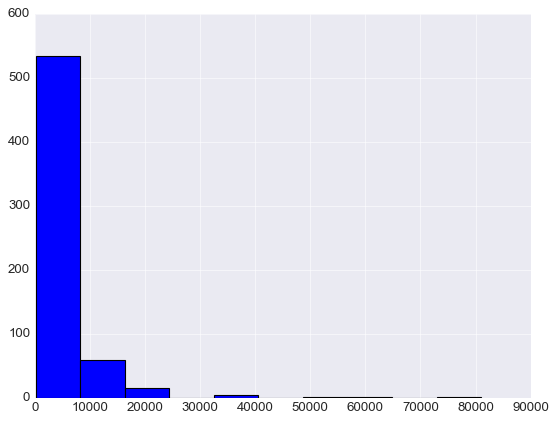

In [34]:
# histogram of the variable ApplicantIncome
df['ApplicantIncome'].hist()

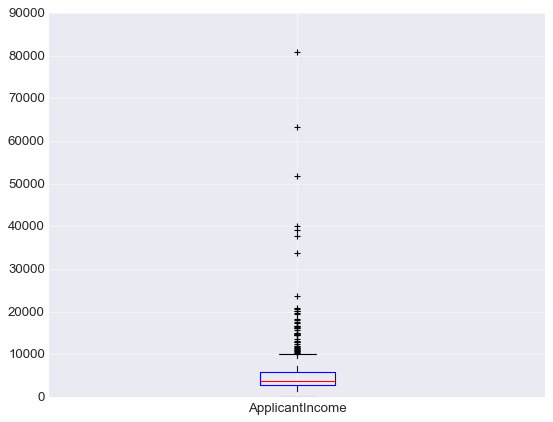

In [35]:
# boxplot of variable ApplicantIncome using training data
df.boxplot(column='ApplicantIncome')

The above boxplot confirm presence of lots of outliers and extereme values.This can be attributed to the income disparity in the society.

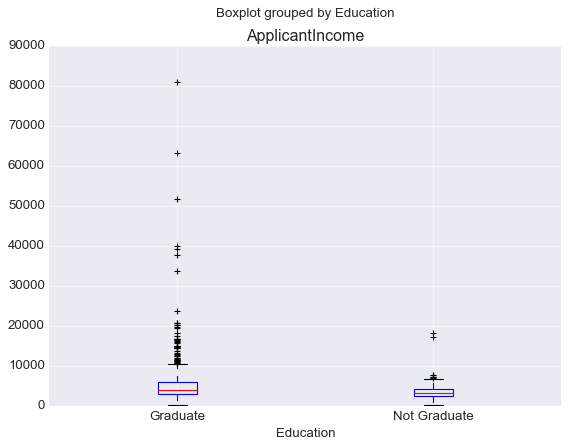

In [36]:
# boxplot of variable ApplicantIncome by variable education using training data
df.boxplot(column='ApplicantIncome',by='Education')


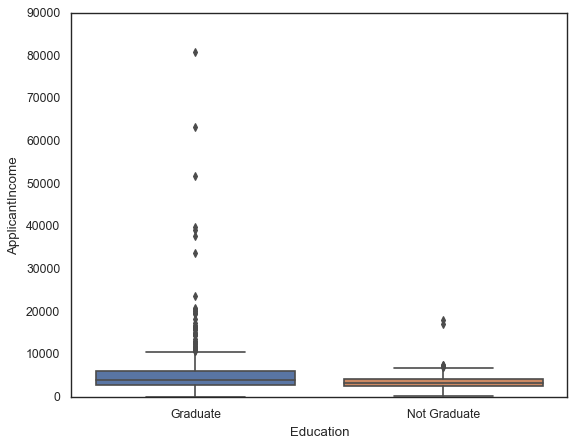

In [37]:
sns.set(style="white",color_codes=True)
sns.boxplot(x='Education',y='ApplicantIncome',data=df)

We can see that there is no substantial difference between mean income of graduate and not graduate.But there are higher no of graduates with very high income which are appearing to be an outliers.

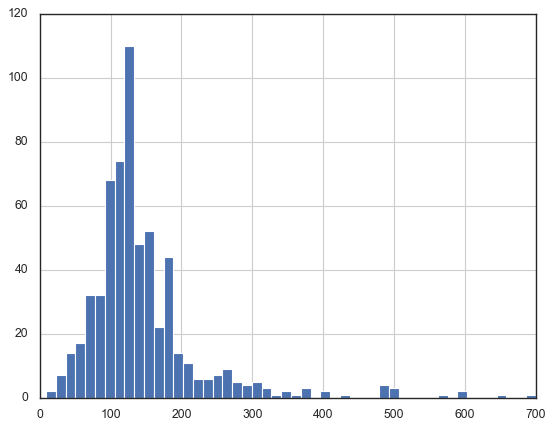

In [38]:
# histogram of variable LoanAmount
df['LoanAmount'].hist(bins=50)

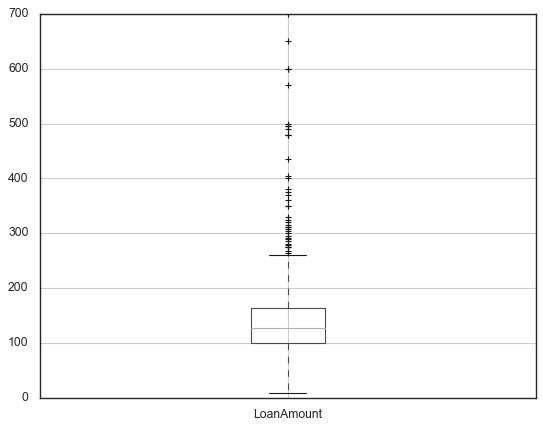

In [39]:
df.boxplot(column='LoanAmount')

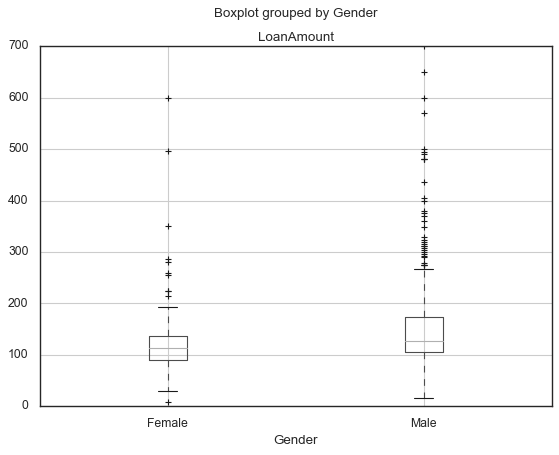

In [40]:
# boxplot of variable loanamount by variable gender using training data
df.boxplot(column='LoanAmount',by='Gender')

Loan amount has missing as well as extereme values while,ApplicantIncome has extreme values only.

# Outliers of Loan amount and Applicant Income

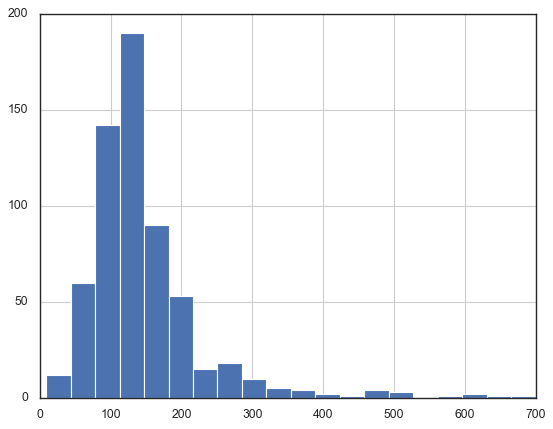

In [41]:

# looking at the distribution of loanamount
df['LoanAmount'].hist(bins=20)

the extreme values are practically possible i.e some people meight apply for high value loans due to specific need .so instead of treating them as outlier.Let's try log transformation to nullify its effect.

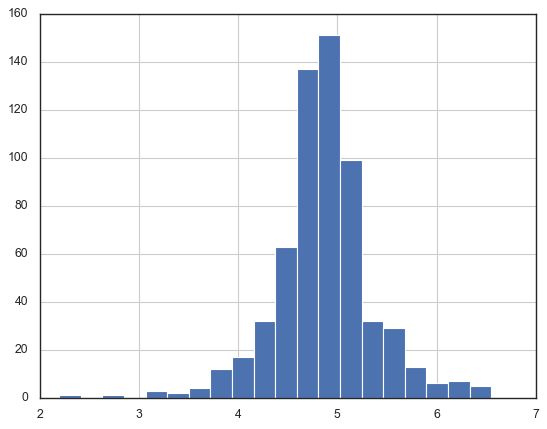

In [42]:
# apply log transformation of loan amount to make it closer to normal
df['LoanAmount_log']=np.log(df['LoanAmount'])

# looking at the distribution of loanamount log
df['LoanAmount_log'].hist(bins=20)

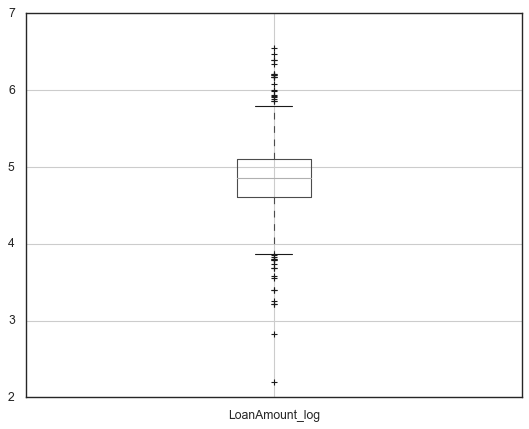

In [43]:
df.boxplot(column='LoanAmount_log')

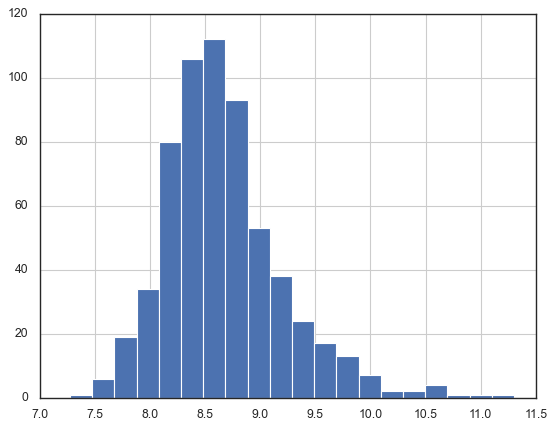

In [44]:

# apply log transformation of totalincome to make it closer to normal
df['TotalIncome_log']=np.log(df['Total_Income'])

# looking at the distribution of totalincome log
df['TotalIncome_log'].hist(bins=20)

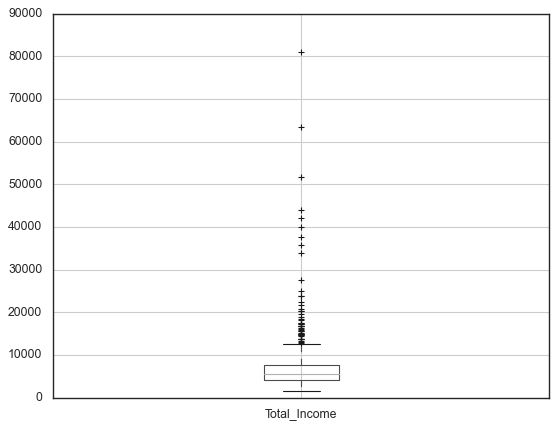

In [45]:
df.boxplot(column='Total_Income')

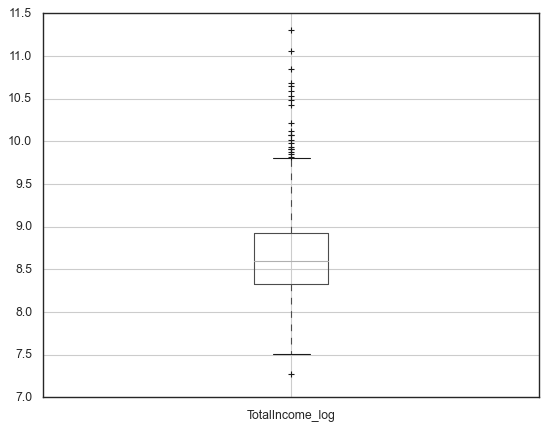

In [46]:
df.boxplot(column='TotalIncome_log')

In [47]:
#sns.distplot(df['TotalIncome_log'])

In [48]:
#df['EMI']=df['LoanAmount']/df['Loan_Amount_Term']
#sns.distplot(df['EMI'])

Text(0.5, 1.0, 'CORRELATION MATRIX - HEATMAP')

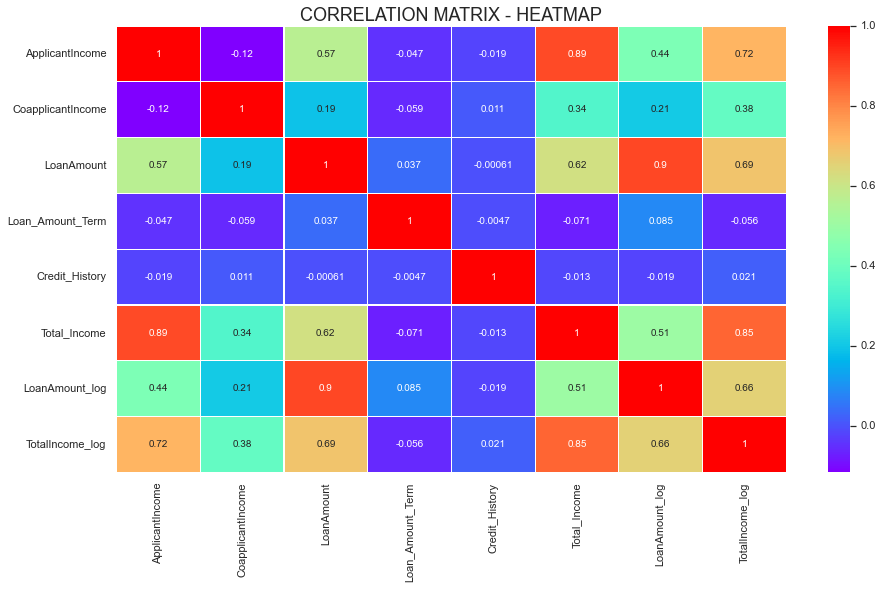

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap="rainbow", annot=True,linewidth=0.1)
plt.title('CORRELATION MATRIX - HEATMAP', size=18)

# LabelEncoding:

In [50]:
from sklearn.preprocessing import LabelEncoder
l=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]

for i in l:
    le = LabelEncoder()
    le.fit(df[i])
    le.classes_
    
    df[i]=le.transform(df[i])
    
    
    
    
    
    # Gender  : Male =1 ,Female=0
    # Married : yes = 1 ,  No =0
    # Education : graduate = 0,Not graduate = 1
    # self employed : yes=1  , No=0
    # Property_Area : Urban = 2, Rular =0 ,semiurban = 1
    # Loan_status  :   Yes= 1 ,No = 0

In [51]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_log,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,High,NaN,5849.0,High,4.852030,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,High,Average,6091.0,Very high,4.852030,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,Average,NaN,3000.0,Average,4.189655,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,Average,Average,4941.0,High,4.787492,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,High,NaN,6000.0,High,4.948760,8.699515


In [52]:
df[["Dependents"]]=df["Dependents"].replace(to_replace={'3+':3})
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_log,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,High,NaN,5849.0,High,4.852030,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,High,Average,6091.0,Very high,4.852030,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,Average,NaN,3000.0,Average,4.189655,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,Average,Average,4941.0,High,4.787492,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,High,NaN,6000.0,High,4.948760,8.699515


In [53]:
df=df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Total_Income','Coapplicant_Income_bin','Income_bin','Total_Income_bin','Loan_Amount_Term'],axis=1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
0,LP001002,1,0,0,0,0,1.0,2,1,4.852030,8.674026
1,LP001003,1,1,1,0,0,1.0,0,0,4.852030,8.714568
2,LP001005,1,1,0,0,1,1.0,2,1,4.189655,8.006368
3,LP001006,1,1,0,1,0,1.0,2,1,4.787492,8.505323
4,LP001008,1,0,0,0,0,1.0,2,1,4.948760,8.699515


Text(0.5, 1.0, 'CORRELATION MATRIX - HEATMAP')

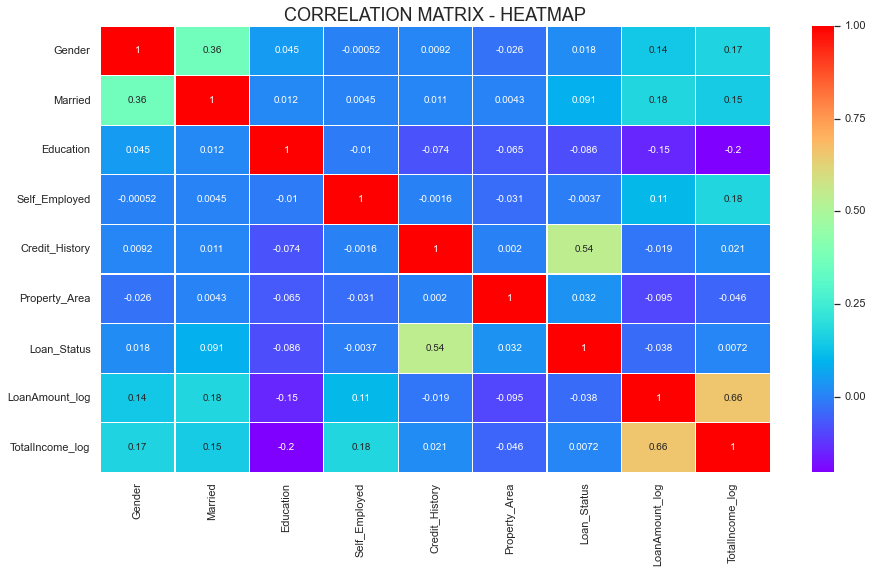

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap="rainbow", annot=True,linewidth=0.1)
plt.title('CORRELATION MATRIX - HEATMAP', size=18)

# Seprate dependent and independent variable

In [55]:
# Separting the Variable into Independent and Dependent 
X = df.drop(["Loan_Status","Loan_ID"],axis=1)
y = df['Loan_Status']


In [56]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log
0,1,0,0,0,0,1.0,2,4.852030,8.674026
1,1,1,1,0,0,1.0,0,4.852030,8.714568
2,1,1,0,0,1,1.0,2,4.189655,8.006368
3,1,1,0,1,0,1.0,2,4.787492,8.505323
4,1,0,0,0,0,1.0,2,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,4.262680,7.972466
610,1,1,3,0,0,1.0,0,3.688879,8.320205
611,1,1,1,0,0,1.0,2,5.533389,9.025456
612,1,1,2,0,0,1.0,2,5.231109,8.933664


In [57]:
print(X.shape)
print(y.shape)

(614, 9)
(614,)


# Train test split:

In [58]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y,train_size=0.80, test_size = 0.20, random_state =0)

In [59]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(491, 9)
(491,)
(123, 9)
(123,)


# Scaling:

In [60]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Decision Tree Classifier

In [61]:
 # Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [62]:
# create Decision tree classifier object
clf= DecisionTreeClassifier(criterion="entropy",max_depth= 3) 

# Train Decision tree classifier
clf=clf.fit(X_train,y_train)

#Predict the response for test data
y_pred= clf.predict(X_test)
print(y_pred)
print(y_pred.shape)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]
(123,)


In [63]:
# prediction for training data
y_pred_t= clf.predict(X_train)
print(y_pred_t)
print(y_pred_t.shape)

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1
 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1]
(49

# Accuracy

In [64]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
acc_train=accuracy_score(y_pred_t,y_train)
print("Accuracy of Decision tree classifier for test data is :",accuracy)
print("Accuracy of Decision tree classifier for train data is :",acc_train)

Accuracy of Decision tree classifier for test data is : 0.8211382113821138
Accuracy of Decision tree classifier for train data is : 0.8167006109979633


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.82      0.97      0.89        90

    accuracy                           0.82       123
   macro avg       0.82      0.70      0.72       123
weighted avg       0.82      0.82      0.80       123



# Confusion Matrix

In [66]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[14, 19],
       [ 3, 87]], dtype=int64)

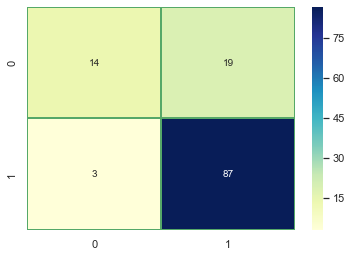

In [67]:
sns.heatmap(cm,annot=True,cmap="YlGnBu",linewidths=1,linecolor='g')

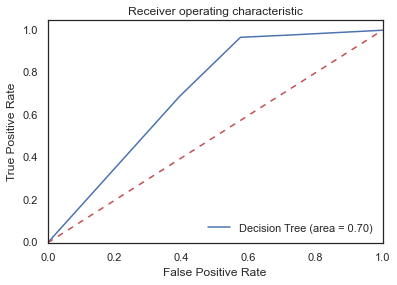

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_DT')
plt.show()

In [69]:
feature_cols=[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'
       ]
feature_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [70]:
df_copy.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [71]:
 #from sklearn.externals.six import StringIO  
 #from IPython.display import Image  
 #from sklearn.tree import export_graphviz
 #import pydotplus


 #dot_data = StringIO()
 #export_graphviz(clf, out_file=dot_data,  
     #            filled=True, rounded=True,
      #           special_characters=True, feature_names =feature_cols )
 #graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
 #graph.write_png('LoanDT.png')
 #Image(graph.create_png())

# Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier
# create random forest classifier
rf_model= RandomForestClassifier(n_estimators = 100,random_state=0)

#training the classifier
rf_model.fit(X_train,y_train)

#Applying trained classifier to test & train
y_pred = rf_model.predict(X_test)
y_pred_t = rf_model.predict(X_train)


# Confusion Matrix & Accuracy

In [73]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(y_pred,y_test)
print(cm)
print(classification_report(y_pred,y_test))

[[14  7]
 [19 83]]
              precision    recall  f1-score   support

           0       0.42      0.67      0.52        21
           1       0.92      0.81      0.86       102

    accuracy                           0.79       123
   macro avg       0.67      0.74      0.69       123
weighted avg       0.84      0.79      0.81       123



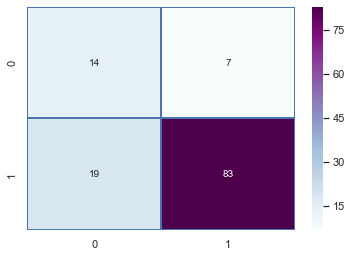

In [74]:
sns.heatmap(cm,annot=True,cmap="BuPu",linewidths=1,linecolor='b',fmt="d")

In [75]:
accuracy= accuracy_score(y_pred,y_test)
acc_t = accuracy_score(y_pred_t,y_train)
print("Accuracy of Random Forest Classifier for test data is :",accuracy)
print("Accuracy of Random Forest Classifier for train data is :",acc_t)


Accuracy of Random Forest Classifier for test data is : 0.7886178861788617
Accuracy of Random Forest Classifier for train data is : 1.0


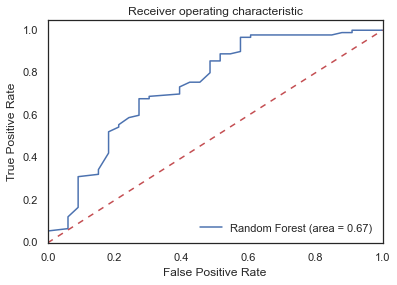

In [76]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rf_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_RF')
plt.show()

# KNN

In [77]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

for i in range(0,9):
    i = i+1
    knn = KNeighborsClassifier(n_neighbors=i)
    #Train the model using the training sets
    knn.fit(X_train,y_train)
    #Predict the response for test dataset
    y_pred=knn.predict(X_test)
    
   
    #accuracy calculation
    acc=metrics.accuracy_score(y_test,y_pred)
    print("Accuracy of Knn for k=",i,'is:',acc)
    

Accuracy of Knn for k= 1 is: 0.7398373983739838
Accuracy of Knn for k= 2 is: 0.6666666666666666
Accuracy of Knn for k= 3 is: 0.7967479674796748
Accuracy of Knn for k= 4 is: 0.7479674796747967
Accuracy of Knn for k= 5 is: 0.8048780487804879
Accuracy of Knn for k= 6 is: 0.7886178861788617
Accuracy of Knn for k= 7 is: 0.8130081300813008
Accuracy of Knn for k= 8 is: 0.8048780487804879
Accuracy of Knn for k= 9 is: 0.8048780487804879


In [78]:
# NOW WITH K=10
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(metrics.confusion_matrix(y_test,pred))

print(metrics.classification_report(y_test,pred))

[[14 19]
 [ 5 85]]
              precision    recall  f1-score   support

           0       0.74      0.42      0.54        33
           1       0.82      0.94      0.88        90

    accuracy                           0.80       123
   macro avg       0.78      0.68      0.71       123
weighted avg       0.80      0.80      0.79       123



In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test,pred),annot=True,cmap="rainbow",linewidths=1,linecolor='w')

In [ ]:
from sklearn.model_selection import cross_val_score
knnclassifier = KNeighborsClassifier(n_neighbors = 5)
print(cross_val_score(knnclassifier,X,y,cv=10,scoring='accuracy').mean())

# stratified K- fold cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

accuracy= []

skf = StratifiedKFold(n_splits=5, random_state=None)
skf.get_n_splits(X,y)
#X is the feature set and y is the target
for train_index, test_index in skf.split(X,y): 
    print('Train:',train_index,'validation:',test_index)
    X1_train,X1_test = X.iloc[train_index], X.iloc[test_index] 
    y1_train,y1_test = y.iloc[train_index], y.iloc[test_index]
    knn.fit(X1_train,y1_train)
    pred = knn.predict(X1_test)
    score=accuracy_score(pred,y1_test)
    accuracy.append(score)

print(accuracy)
    

In [ ]:
np.array(accuracy).mean()

# Naive bayes algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB 
# fit model
nb_model= GaussianNB()

#Train model using training set
nb_model.fit(X_train,y_train)

# Predict response fot test set & train set
y_pred=nb_model.predict(X_test)
y_pred_t=nb_model.predict(X_train)



# Accuracy

In [ ]:
#Model Accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy of Naive Bayes Classifier for test data is :",metrics.accuracy_score(y_test,y_pred))
print("Accuracy of Naive Bayes Classifier for train data is :",metrics.accuracy_score(y_train,y_pred_t))


# Confusion Matrix:

In [ ]:
# implementing the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


In [ ]:
sns.heatmap(cm,annot=True,cmap="rainbow",linewidths=1,linecolor='pink',fmt="d")

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, nb_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_NB')
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC


In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
predictions = lr_model.predict(X_test)
predictions_t = lr_model.predict(X_train)

print("Accuracy of Logistic Regression for test data is :",metrics.accuracy_score(y_test, predictions))
print("Accuracy of Logistic Regression for train data is :",metrics.accuracy_score(y_train, predictions_t))


so our prediction are almost 83% accurate i.e we have identified 83% of loan status correct.

# Confusion Matrix:

In [ ]:
# implementing the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
print(cm)


In [ ]:
sns.heatmap(cm,annot=True,cmap="rainbow",linewidths=1,linecolor='pink',fmt="d")

In [ ]:
# from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

# ROC curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

 curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

# Cross Validation

# K fold CV

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr_model,X,y,cv=10)
score

In [ ]:
score.mean()

# Stratified K-Fold cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

accuracy= []

skf = StratifiedKFold(n_splits=5, random_state=None)
skf.get_n_splits(X,y)
#X is the feature set and y is the target
for train_index, test_index in skf.split(X,y): 
    print('Train:',train_index,'validation:',test_index)
    X1_train,X1_test = X.iloc[train_index], X.iloc[test_index] 
    y1_train,y1_test = y.iloc[train_index], y.iloc[test_index]
    lr_model.fit(X1_train,y1_train)
    predictions = lr_model.predict(X1_test)
    score=accuracy_score(predictions,y1_test)
    accuracy.append(score)

print(accuracy)
    

In [ ]:
np.array(accuracy).mean()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
i=1
skf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
#X is the feature set and y is the target
for train_index, test_index in skf.split(X,y): 
    print('\n{} of kfold {}'.format(i,skf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index] 
    ytr,yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = metrics.accuracy_score(yvl,pred_test)
    print("Accuracy score :",score)
    i+=1
    pred_test=model.predict(xvl)
    pred=model.predict_prob(xvl)[:,1]
    

# SVM

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  



In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  
y_pred

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

In [ ]:
sns.heatmap(cm,annot=True,linewidths=2,linecolor='white',fmt="d")

In [ ]:
accuracy = float(cm.diagonal().sum())/len(y_test)
acc_t=float(cm.diagonal().sum())/len(y_train)
print("\nAccuracy Of SVM For The test Dataset : ", accuracy)
print("\nAccuracy Of SVM For The train Dataset : ", acc_t)


In [ ]:
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
#logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
#fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
#plt.figure()
#plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc)
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right")
#plt.savefig('Log_ROC_SVM')
#plt.show()

# Feature Importance 

In [ ]:
importance=pd.Series(rf_model.feature_importances_,index=X.columns)
importance.plot(kind='barh',figsize=(8,8))

In [ ]:
importance=pd.Series(clf.feature_importances_,index=X.columns)
importance.plot(kind='barh',figsize=(10,8))

In [ ]:
importance=pd.Series(lr_model.coef_[0],index=X.columns)
importance.plot(kind='barh',figsize=(8,8))